Installing Required Libraries

In [ ]:
#installing autogluon
!pip install autogluon -q

Import Required Libraries

In [ ]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

import torch
import torch.nn as nn
import torch.optim as optim

from autogluon.tabular import TabularDataset, TabularPredictor

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tabulate import tabulate

Loading IRIS dataset and normalizing it

In [ ]:
#loading iris dataset
iris = load_iris()
#extracting features
X = iris.data
#extracting labels
y = iris.target.reshape(-1, 1)
#normalizing
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

Splitting the dataset into training and test data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
#printing size of the datasets
print(f"the size of training set: {len(X_train)}")
print(f"the size of testing set: {len(X_test)}")

the size of training set: 120
the size of testing set: 30


Coverting all the arrays to TabularDatasets

In [ ]:
#defining columns
feature_columns = ['sepal length', 'sepal width', 'petal length', 'petal width']
target_column = ['target']
all_columns = feature_columns + target_column

#creating dataframes
train_df = pd.DataFrame(np.hstack((X_train, y_train)), columns=all_columns)
test_df = pd.DataFrame(X_test, columns=feature_columns)
y_test_df = pd.DataFrame(y_test, columns=target_column)

#converting to tabulardataset
train_data = TabularDataset(train_df)
test_data = TabularDataset(test_df)

Dataset Overview

In [ ]:
print(f"training samples: {len(train_data)}")
print(f"testing samples: {len(test_data)}")

training samples: 120
testing samples: 30


Class Distribution in Training

In [ ]:
#printing class distribution in training set
print("Training Set Class Distribution:\n", train_df.groupby('target').size() / len(train_df))

Training Set Class Distribution:
 target
0.0    0.333333
1.0    0.333333
2.0    0.333333
dtype: float64


Task 1 : Hyperparameter Optimization

Function to train the model with manual hyperparameters

In [ ]:
def train_model(train_data, batch_size, lr, epochs):
    predictor = TabularPredictor(
        label='target',
        verbosity=4,
        problem_type='multiclass',
        eval_metric='accuracy'
    )
    predictor.fit(
        train_data,
        hyperparameters={
            'NN_TORCH': {
                'num_epochs': epochs,
                'learning_rate': lr,
                'batch_size': batch_size,
                'hidden_size': 4,
            }
        },
        time_limit=600,
        presets='good_quality_faster_inference_only_refit',
        ag_args_fit={'num_gpus': 0}
    )

    return predictor

No path specified. Models will be saved in: "AutogluonModels/ag-20250227_145504"
Preset alias specified: 'good_quality_faster_inference_only_refit' maps to 'good_quality'.
Verbosity: 4 (Maximum Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       11.16 GB / 12.67 GB (88.0%)
Disk Space Avail:   71.20 GB / 107.72 GB (66.1%)
Presets specified: ['good_quality_faster_inference_only_refit']
============ fit kwarg info ============
User Specified kwargs:
{'ag_args_fit': {'num_gpus': 0},
 'auto_stack': True,
 'num_bag_sets': 1,
 'refit_full': True,
 'save_bag_folds': False,
 'set_best_to_refit_full': True}
Full kwargs:
{'_feature_generator_kwargs': None,
 '_save_bag_folds': None,
 'ag_args': None,
 'ag_args_ensemble': None,
 'ag_args_fit': {'num_gpu

training parameters : 
 batch_size=2, lr=0.001, epochs=1


	Running DyStack sub-fit in a ray process to avoid memory leakage. Enabling ray logging (enable_ray_logging=True). Specify `ds_args={'enable_ray_logging': False}` if you experience logging issues.
2025-02-27 14:55:08,740	INFO worker.py:1810 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 
		Context path: "/content/AutogluonModels/ag-20250227_145504/ds_sub_fit/sub_fit_ho"
(_dystack pid=14525) Running DyStack sub-fit ...
(_dystack pid=14525) Saving /content/AutogluonModels/ag-20250227_145504/ds_sub_fit/sub_fit_ho/learner.pkl
(_dystack pid=14525) Saving /content/AutogluonModels/ag-20250227_145504/ds_sub_fit/sub_fit_ho/predictor.pkl
(_dystack pid=14525) Beginning AutoGluon training ... Time limit = 143s
(_dystack pid=14525) AutoGluon will save models to "/content/AutogluonModels/ag-20250227_145504/ds_sub_fit/sub_fit_ho"
(_dystack pid=14525) Train Data Rows:    106
(_dystack pid=14525) Train Data Columns: 4
(_dystack pid=14525) Label Column:       target
(_dysta

accuracy: 0.3333
f1 score: 0.1667


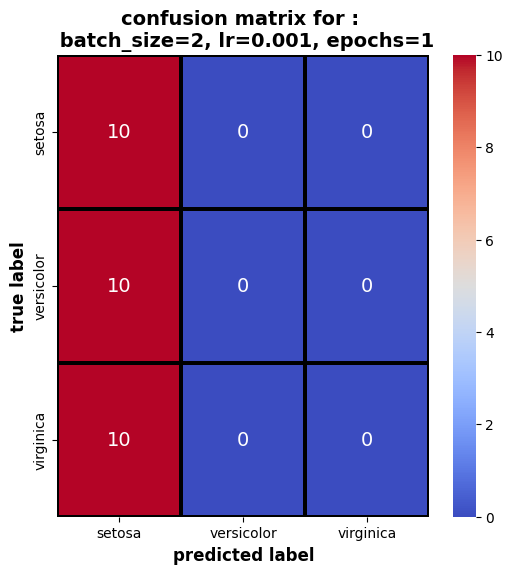

No path specified. Models will be saved in: "AutogluonModels/ag-20250227_145900"
Preset alias specified: 'good_quality_faster_inference_only_refit' maps to 'good_quality'.
Verbosity: 4 (Maximum Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       9.86 GB / 12.67 GB (77.8%)
Disk Space Avail:   71.18 GB / 107.72 GB (66.1%)
Presets specified: ['good_quality_faster_inference_only_refit']
============ fit kwarg info ============
User Specified kwargs:
{'ag_args_fit': {'num_gpus': 0},
 'auto_stack': True,
 'num_bag_sets': 1,
 'refit_full': True,
 'save_bag_folds': False,
 'set_best_to_refit_full': True}
Full kwargs:
{'_feature_generator_kwargs': None,
 '_save_bag_folds': None,
 'ag_args': None,
 'ag_args_ensemble': None,
 'ag_args_fit': {'num_gpus

training parameters : 
 batch_size=2, lr=0.001, epochs=3


Leaderboard on holdout data (DyStack):
                        model  score_holdout  score_val eval_metric  pred_time_test pred_time_val  fit_time  pred_time_test_marginal pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  NeuralNetTorch_BAG_L2_FULL       0.357143   0.330189    accuracy        0.015520          None  3.897322                 0.008842                   None           0.344921            2       True          3
1  NeuralNetTorch_BAG_L1_FULL       0.285714   0.339623    accuracy        0.006678          None  3.552401                 0.006678                   None           3.552401            1       True          1
2    WeightedEnsemble_L3_FULL       0.285714   0.339623    accuracy        0.008232          None  3.564208                 0.001554                   None           0.011807            3       True          4
3    WeightedEnsemble_L2_FULL       0.285714   0.339623    accuracy        0.008295          None  3.557082              

accuracy: 0.3333
f1 score: 0.1667


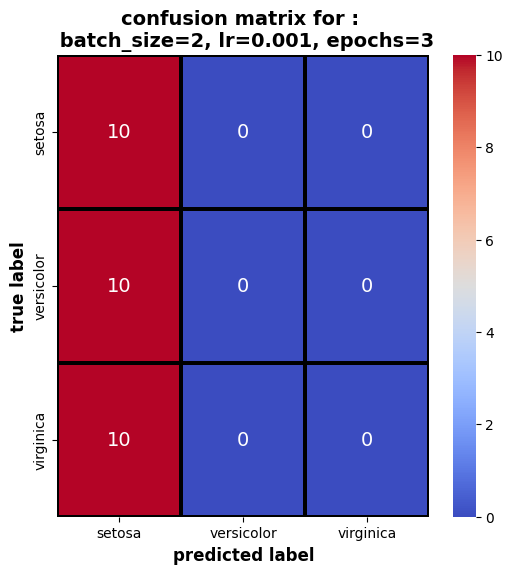

No path specified. Models will be saved in: "AutogluonModels/ag-20250227_150230"
Preset alias specified: 'good_quality_faster_inference_only_refit' maps to 'good_quality'.
Verbosity: 4 (Maximum Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       9.83 GB / 12.67 GB (77.6%)
Disk Space Avail:   71.18 GB / 107.72 GB (66.1%)
Presets specified: ['good_quality_faster_inference_only_refit']
============ fit kwarg info ============
User Specified kwargs:
{'ag_args_fit': {'num_gpus': 0},
 'auto_stack': True,
 'num_bag_sets': 1,
 'refit_full': True,
 'save_bag_folds': False,
 'set_best_to_refit_full': True}
Full kwargs:
{'_feature_generator_kwargs': None,
 '_save_bag_folds': None,
 'ag_args': None,
 'ag_args_ensemble': None,
 'ag_args_fit': {'num_gpus

training parameters : 
 batch_size=2, lr=0.001, epochs=5


Leaderboard on holdout data (DyStack):
                        model  score_holdout  score_val eval_metric  pred_time_test pred_time_val  fit_time  pred_time_test_marginal pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  NeuralNetTorch_BAG_L2_FULL       0.357143   0.330189    accuracy        0.030862          None  3.772502                 0.020468                   None           0.544348            2       True          3
1  NeuralNetTorch_BAG_L1_FULL       0.285714   0.339623    accuracy        0.010395          None  3.228154                 0.010395                   None           3.228154            1       True          1
2    WeightedEnsemble_L2_FULL       0.285714   0.339623    accuracy        0.013314          None  3.233793                 0.002919                   None           0.005639            2       True          2
3    WeightedEnsemble_L3_FULL       0.285714   0.339623    accuracy        0.013479          None  3.232270              

accuracy: 0.3333
f1 score: 0.1667


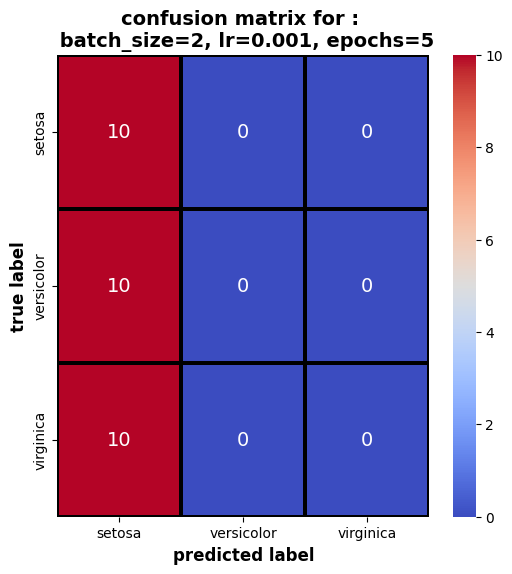

No path specified. Models will be saved in: "AutogluonModels/ag-20250227_150610"
Preset alias specified: 'good_quality_faster_inference_only_refit' maps to 'good_quality'.
Verbosity: 4 (Maximum Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       9.84 GB / 12.67 GB (77.6%)
Disk Space Avail:   71.18 GB / 107.72 GB (66.1%)
Presets specified: ['good_quality_faster_inference_only_refit']
============ fit kwarg info ============
User Specified kwargs:
{'ag_args_fit': {'num_gpus': 0},
 'auto_stack': True,
 'num_bag_sets': 1,
 'refit_full': True,
 'save_bag_folds': False,
 'set_best_to_refit_full': True}
Full kwargs:
{'_feature_generator_kwargs': None,
 '_save_bag_folds': None,
 'ag_args': None,
 'ag_args_ensemble': None,
 'ag_args_fit': {'num_gpus

training parameters : 
 batch_size=2, lr=1e-05, epochs=1


Leaderboard on holdout data (DyStack):
                        model  score_holdout  score_val eval_metric  pred_time_test pred_time_val  fit_time  pred_time_test_marginal pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  NeuralNetTorch_BAG_L2_FULL       0.357143   0.330189    accuracy        0.017053          None  2.925040                 0.010052                   None           0.126976            2       True          3
1  NeuralNetTorch_BAG_L1_FULL       0.285714   0.339623    accuracy        0.007001          None  2.798064                 0.007001                   None           2.798064            1       True          1
2    WeightedEnsemble_L2_FULL       0.285714   0.339623    accuracy        0.008714          None  2.803586                 0.001713                   None           0.005522            2       True          2
3    WeightedEnsemble_L3_FULL       0.285714   0.339623    accuracy        0.008746          None  2.802135              

accuracy: 0.3333
f1 score: 0.1667


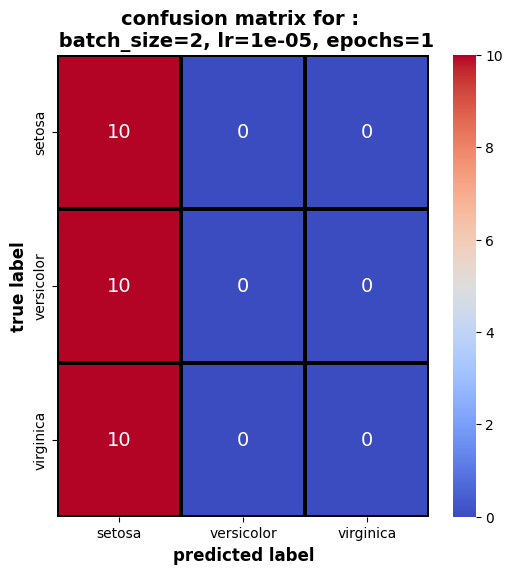

No path specified. Models will be saved in: "AutogluonModels/ag-20250227_150933"
Preset alias specified: 'good_quality_faster_inference_only_refit' maps to 'good_quality'.
Verbosity: 4 (Maximum Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       9.85 GB / 12.67 GB (77.7%)
Disk Space Avail:   71.17 GB / 107.72 GB (66.1%)
Presets specified: ['good_quality_faster_inference_only_refit']
============ fit kwarg info ============
User Specified kwargs:
{'ag_args_fit': {'num_gpus': 0},
 'auto_stack': True,
 'num_bag_sets': 1,
 'refit_full': True,
 'save_bag_folds': False,
 'set_best_to_refit_full': True}
Full kwargs:
{'_feature_generator_kwargs': None,
 '_save_bag_folds': None,
 'ag_args': None,
 'ag_args_ensemble': None,
 'ag_args_fit': {'num_gpus

training parameters : 
 batch_size=2, lr=1e-05, epochs=3


Leaderboard on holdout data (DyStack):
                        model  score_holdout  score_val eval_metric  pred_time_test pred_time_val  fit_time  pred_time_test_marginal pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  NeuralNetTorch_BAG_L2_FULL       0.357143   0.330189    accuracy        0.023868          None  3.194937                 0.013678                   None           0.428590            2       True          3
1  NeuralNetTorch_BAG_L1_FULL       0.285714   0.339623    accuracy        0.010190          None  2.766347                 0.010190                   None           2.766347            1       True          1
2    WeightedEnsemble_L3_FULL       0.285714   0.339623    accuracy        0.012205          None  2.774346                 0.002015                   None           0.007999            3       True          4
3    WeightedEnsemble_L2_FULL       0.285714   0.339623    accuracy        0.012849          None  2.770982              

accuracy: 0.3333
f1 score: 0.1667


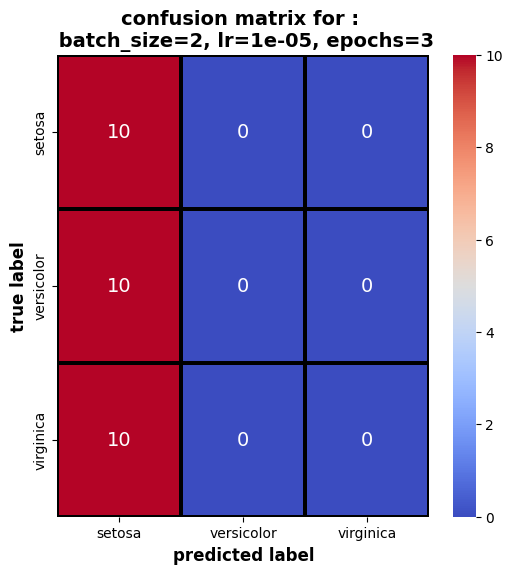

No path specified. Models will be saved in: "AutogluonModels/ag-20250227_151309"
Preset alias specified: 'good_quality_faster_inference_only_refit' maps to 'good_quality'.
Verbosity: 4 (Maximum Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       9.83 GB / 12.67 GB (77.6%)
Disk Space Avail:   71.17 GB / 107.72 GB (66.1%)
Presets specified: ['good_quality_faster_inference_only_refit']
============ fit kwarg info ============
User Specified kwargs:
{'ag_args_fit': {'num_gpus': 0},
 'auto_stack': True,
 'num_bag_sets': 1,
 'refit_full': True,
 'save_bag_folds': False,
 'set_best_to_refit_full': True}
Full kwargs:
{'_feature_generator_kwargs': None,
 '_save_bag_folds': None,
 'ag_args': None,
 'ag_args_ensemble': None,
 'ag_args_fit': {'num_gpus

training parameters : 
 batch_size=2, lr=1e-05, epochs=5


Leaderboard on holdout data (DyStack):
                        model  score_holdout  score_val eval_metric  pred_time_test pred_time_val  fit_time  pred_time_test_marginal pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  NeuralNetTorch_BAG_L2_FULL       0.357143   0.330189    accuracy        0.018336          None  3.732601                 0.011353                   None           0.553180            2       True          3
1  NeuralNetTorch_BAG_L1_FULL       0.285714   0.339623    accuracy        0.006984          None  3.179421                 0.006984                   None           3.179421            1       True          1
2    WeightedEnsemble_L3_FULL       0.285714   0.339623    accuracy        0.008728          None  3.184666                 0.001745                   None           0.005245            3       True          4
3    WeightedEnsemble_L2_FULL       0.285714   0.339623    accuracy        0.009551          None  3.186322              

accuracy: 0.3333
f1 score: 0.1667


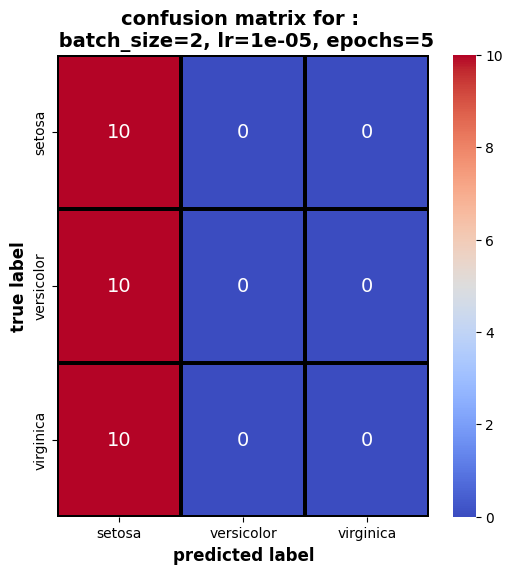

No path specified. Models will be saved in: "AutogluonModels/ag-20250227_151659"
Preset alias specified: 'good_quality_faster_inference_only_refit' maps to 'good_quality'.
Verbosity: 4 (Maximum Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       9.82 GB / 12.67 GB (77.5%)
Disk Space Avail:   71.17 GB / 107.72 GB (66.1%)
Presets specified: ['good_quality_faster_inference_only_refit']
============ fit kwarg info ============
User Specified kwargs:
{'ag_args_fit': {'num_gpus': 0},
 'auto_stack': True,
 'num_bag_sets': 1,
 'refit_full': True,
 'save_bag_folds': False,
 'set_best_to_refit_full': True}
Full kwargs:
{'_feature_generator_kwargs': None,
 '_save_bag_folds': None,
 'ag_args': None,
 'ag_args_ensemble': None,
 'ag_args_fit': {'num_gpus

training parameters : 
 batch_size=4, lr=0.001, epochs=1


Leaderboard on holdout data (DyStack):
                        model  score_holdout  score_val eval_metric  pred_time_test pred_time_val  fit_time  pred_time_test_marginal pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  NeuralNetTorch_BAG_L2_FULL       0.357143   0.330189    accuracy        0.018250          None  2.765942                 0.011317                   None           0.075777            2       True          3
1  NeuralNetTorch_BAG_L1_FULL       0.285714   0.339623    accuracy        0.006932          None  2.690164                 0.006932                   None           2.690164            1       True          1
2    WeightedEnsemble_L2_FULL       0.285714   0.339623    accuracy        0.008610          None  2.708844                 0.001677                   None           0.018680            2       True          2
3    WeightedEnsemble_L3_FULL       0.285714   0.339623    accuracy        0.009306          None  2.696875              

accuracy: 0.3333
f1 score: 0.1667


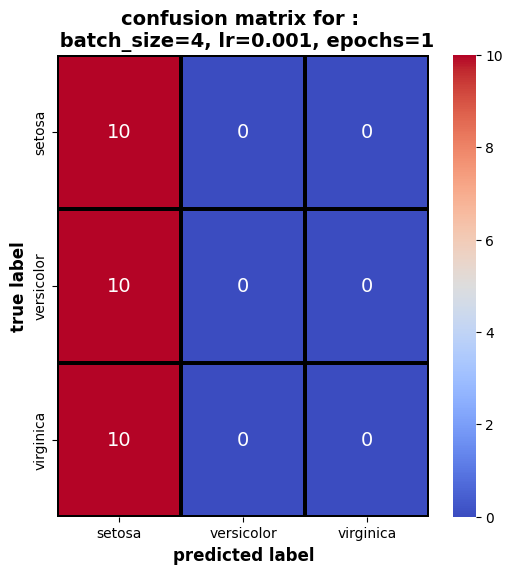

No path specified. Models will be saved in: "AutogluonModels/ag-20250227_152026"
Preset alias specified: 'good_quality_faster_inference_only_refit' maps to 'good_quality'.
Verbosity: 4 (Maximum Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       9.84 GB / 12.67 GB (77.6%)
Disk Space Avail:   71.17 GB / 107.72 GB (66.1%)
Presets specified: ['good_quality_faster_inference_only_refit']
============ fit kwarg info ============
User Specified kwargs:
{'ag_args_fit': {'num_gpus': 0},
 'auto_stack': True,
 'num_bag_sets': 1,
 'refit_full': True,
 'save_bag_folds': False,
 'set_best_to_refit_full': True}
Full kwargs:
{'_feature_generator_kwargs': None,
 '_save_bag_folds': None,
 'ag_args': None,
 'ag_args_ensemble': None,
 'ag_args_fit': {'num_gpus

training parameters : 
 batch_size=4, lr=0.001, epochs=3


Leaderboard on holdout data (DyStack):
                        model  score_holdout  score_val eval_metric  pred_time_test pred_time_val  fit_time  pred_time_test_marginal pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  NeuralNetTorch_BAG_L2_FULL       0.357143   0.330189    accuracy        0.014994          None  3.099048                 0.007690                   None           0.205248            2       True          3
1  NeuralNetTorch_BAG_L1_FULL       0.285714   0.339623    accuracy        0.007304          None  2.893801                 0.007304                   None           2.893801            1       True          1
2    WeightedEnsemble_L3_FULL       0.285714   0.339623    accuracy        0.009112          None  2.897913                 0.001808                   None           0.004112            3       True          4
3    WeightedEnsemble_L2_FULL       0.285714   0.339623    accuracy        0.009595          None  2.907433              

accuracy: 0.3333
f1 score: 0.1667


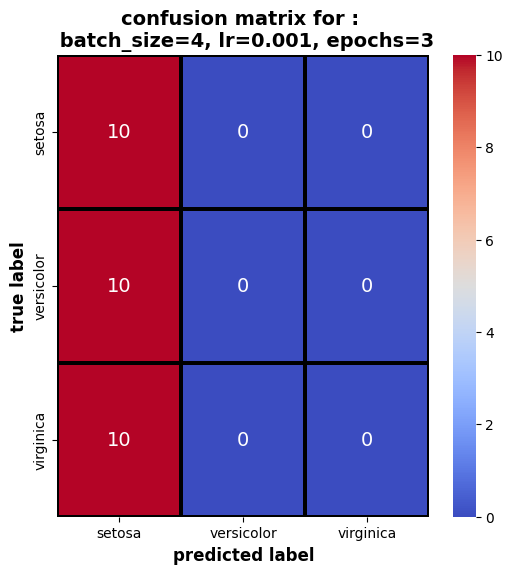

No path specified. Models will be saved in: "AutogluonModels/ag-20250227_152401"
Preset alias specified: 'good_quality_faster_inference_only_refit' maps to 'good_quality'.
Verbosity: 4 (Maximum Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       9.83 GB / 12.67 GB (77.6%)
Disk Space Avail:   71.17 GB / 107.72 GB (66.1%)
Presets specified: ['good_quality_faster_inference_only_refit']
============ fit kwarg info ============
User Specified kwargs:
{'ag_args_fit': {'num_gpus': 0},
 'auto_stack': True,
 'num_bag_sets': 1,
 'refit_full': True,
 'save_bag_folds': False,
 'set_best_to_refit_full': True}
Full kwargs:
{'_feature_generator_kwargs': None,
 '_save_bag_folds': None,
 'ag_args': None,
 'ag_args_ensemble': None,
 'ag_args_fit': {'num_gpus

training parameters : 
 batch_size=4, lr=0.001, epochs=5


Leaderboard on holdout data (DyStack):
                        model  score_holdout  score_val eval_metric  pred_time_test pred_time_val  fit_time  pred_time_test_marginal pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  NeuralNetTorch_BAG_L2_FULL       0.357143   0.330189    accuracy        0.037603          None  5.276344                 0.025158                   None           0.274228            2       True          3
1  NeuralNetTorch_BAG_L1_FULL       0.285714   0.339623    accuracy        0.012445          None  5.002116                 0.012445                   None           5.002116            1       True          1
2    WeightedEnsemble_L3_FULL       0.285714   0.339623    accuracy        0.014398          None  5.013619                 0.001952                   None           0.011503            3       True          4
3    WeightedEnsemble_L2_FULL       0.285714   0.339623    accuracy        0.014987          None  5.008721              

accuracy: 0.3333
f1 score: 0.1667


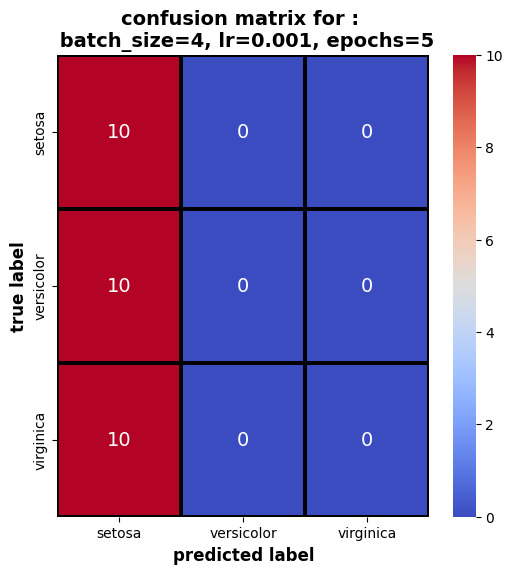

No path specified. Models will be saved in: "AutogluonModels/ag-20250227_152740"
Preset alias specified: 'good_quality_faster_inference_only_refit' maps to 'good_quality'.
Verbosity: 4 (Maximum Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       9.83 GB / 12.67 GB (77.5%)
Disk Space Avail:   71.17 GB / 107.72 GB (66.1%)
Presets specified: ['good_quality_faster_inference_only_refit']
============ fit kwarg info ============
User Specified kwargs:
{'ag_args_fit': {'num_gpus': 0},
 'auto_stack': True,
 'num_bag_sets': 1,
 'refit_full': True,
 'save_bag_folds': False,
 'set_best_to_refit_full': True}
Full kwargs:
{'_feature_generator_kwargs': None,
 '_save_bag_folds': None,
 'ag_args': None,
 'ag_args_ensemble': None,
 'ag_args_fit': {'num_gpus

training parameters : 
 batch_size=4, lr=1e-05, epochs=1


Leaderboard on holdout data (DyStack):
                        model  score_holdout  score_val eval_metric  pred_time_test pred_time_val  fit_time  pred_time_test_marginal pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  NeuralNetTorch_BAG_L2_FULL       0.357143   0.330189    accuracy        0.018050          None  2.772370                 0.011402                   None           0.104992            2       True          3
1  NeuralNetTorch_BAG_L1_FULL       0.285714   0.339623    accuracy        0.006647          None  2.667378                 0.006647                   None           2.667378            1       True          1
2    WeightedEnsemble_L2_FULL       0.285714   0.339623    accuracy        0.008311          None  2.671361                 0.001664                   None           0.003983            2       True          2
3    WeightedEnsemble_L3_FULL       0.285714   0.339623    accuracy        0.008905          None  2.673112              

accuracy: 0.3333
f1 score: 0.1667


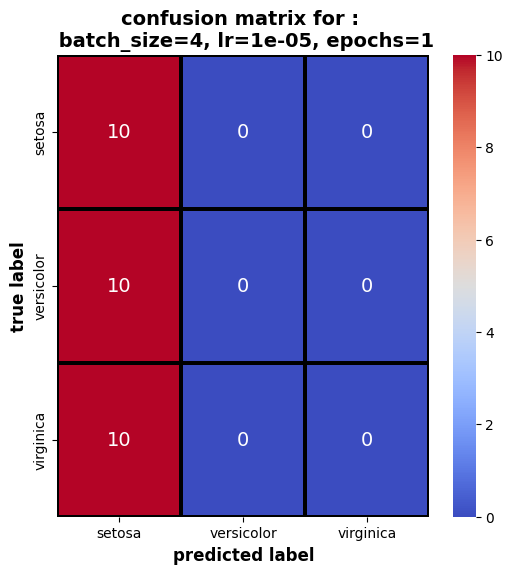

No path specified. Models will be saved in: "AutogluonModels/ag-20250227_153109"
Preset alias specified: 'good_quality_faster_inference_only_refit' maps to 'good_quality'.
Verbosity: 4 (Maximum Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       9.83 GB / 12.67 GB (77.6%)
Disk Space Avail:   71.17 GB / 107.72 GB (66.1%)
Presets specified: ['good_quality_faster_inference_only_refit']
============ fit kwarg info ============
User Specified kwargs:
{'ag_args_fit': {'num_gpus': 0},
 'auto_stack': True,
 'num_bag_sets': 1,
 'refit_full': True,
 'save_bag_folds': False,
 'set_best_to_refit_full': True}
Full kwargs:
{'_feature_generator_kwargs': None,
 '_save_bag_folds': None,
 'ag_args': None,
 'ag_args_ensemble': None,
 'ag_args_fit': {'num_gpus

training parameters : 
 batch_size=4, lr=1e-05, epochs=3


Leaderboard on holdout data (DyStack):
                        model  score_holdout  score_val eval_metric  pred_time_test pred_time_val  fit_time  pred_time_test_marginal pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  NeuralNetTorch_BAG_L2_FULL       0.357143   0.330189    accuracy        0.024333          None  4.712781                 0.014562                   None           0.204182            2       True          3
1  NeuralNetTorch_BAG_L1_FULL       0.285714   0.339623    accuracy        0.009770          None  4.508599                 0.009770                   None           4.508599            1       True          1
2    WeightedEnsemble_L3_FULL       0.285714   0.339623    accuracy        0.011596          None  4.533914                 0.001826                   None           0.025315            3       True          4
3    WeightedEnsemble_L2_FULL       0.285714   0.339623    accuracy        0.012473          None  4.515174              

accuracy: 0.3333
f1 score: 0.1667


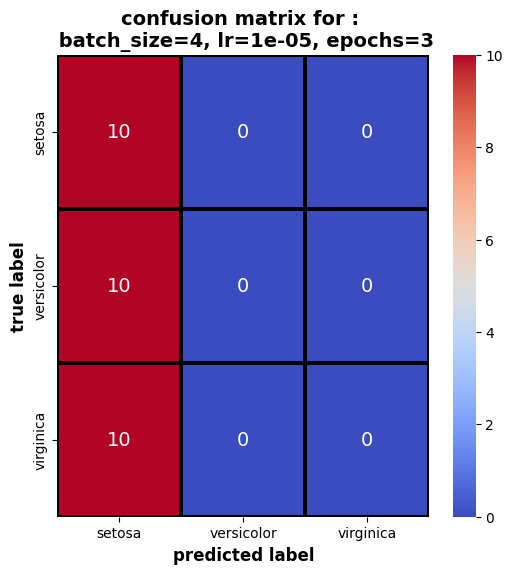

No path specified. Models will be saved in: "AutogluonModels/ag-20250227_153448"
Preset alias specified: 'good_quality_faster_inference_only_refit' maps to 'good_quality'.
Verbosity: 4 (Maximum Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       9.82 GB / 12.67 GB (77.5%)
Disk Space Avail:   71.17 GB / 107.72 GB (66.1%)
Presets specified: ['good_quality_faster_inference_only_refit']
============ fit kwarg info ============
User Specified kwargs:
{'ag_args_fit': {'num_gpus': 0},
 'auto_stack': True,
 'num_bag_sets': 1,
 'refit_full': True,
 'save_bag_folds': False,
 'set_best_to_refit_full': True}
Full kwargs:
{'_feature_generator_kwargs': None,
 '_save_bag_folds': None,
 'ag_args': None,
 'ag_args_ensemble': None,
 'ag_args_fit': {'num_gpus

training parameters : 
 batch_size=4, lr=1e-05, epochs=5


Leaderboard on holdout data (DyStack):
                        model  score_holdout  score_val eval_metric  pred_time_test pred_time_val  fit_time  pred_time_test_marginal pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  NeuralNetTorch_BAG_L2_FULL       0.357143   0.330189    accuracy        0.020443          None  5.226668                 0.013442                   None           0.384981            2       True          3
1  NeuralNetTorch_BAG_L1_FULL       0.285714   0.339623    accuracy        0.007001          None  4.841687                 0.007001                   None           4.841687            1       True          1
2    WeightedEnsemble_L2_FULL       0.285714   0.339623    accuracy        0.008800          None  4.848440                 0.001799                   None           0.006753            2       True          2
3    WeightedEnsemble_L3_FULL       0.285714   0.339623    accuracy        0.010040          None  4.847651              

accuracy: 0.3333
f1 score: 0.1667


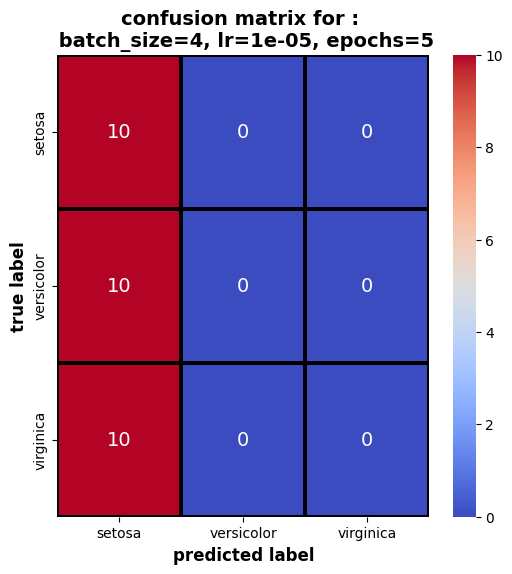

In [ ]:
#defining hyperparameter grid
batch_sizes = [2, 4]
learning_rates = [1e-3, 1e-5]
epochs = [1, 3, 5]

#empty lists to store accuracy and F1-score
accuracies = []
f1_scores = []

#iterating over all the hyperparameters
for batch_size, lr, epoch in product(batch_sizes, learning_rates, epochs):
            print(f"training parameters : \n batch_size={batch_size}, lr={lr}, epochs={epoch}")

            #training the model
            model = train_model(train_data, batch_size, lr, epoch)

            #making predictions on test data
            predictions = model.predict(test_data)

            #computing and appending accuracy and F1-score
            accuracy = accuracy_score(y_test, predictions)
            f1 = f1_score(y_test, predictions, average='weighted')
            print(f"accuracy: {accuracy:.4f}")
            print(f"f1 score: {f1:.4f}")
            accuracies.append(accuracy)
            f1_scores.append(f1)

            #plotting confusion matrix
            cm = confusion_matrix(y_test, predictions)
            plt.figure(figsize=(6, 6))
            sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', linewidths=1.5, linecolor='black',
                        xticklabels=iris.target_names, yticklabels=iris.target_names, cbar=True, annot_kws={"size": 14})

            plt.xlabel('predicted label', fontsize=12, fontweight='bold')
            plt.ylabel('true label', fontsize=12, fontweight='bold')
            plt.title(f'confusion matrix for : \n batch_size={batch_size}, lr={lr}, epochs={epoch}',fontsize=14, fontweight='bold')
            plt.show()

Printing 5 random samples from the test set with their : Input features, predicted labels and true labels

In [ ]:
import random

#selecting 5 random indices from the test set
sample_indices = random.sample(range(len(test_data)), 5)

print("\n=== Sample Predictions ===\n")
for i in sample_indices:
    #printing the input features
    print(f"Input: {test_data.iloc[i]}")
    print(f"Predicted: {predictions[i]}")
    print(f"Truth: {y_test[i]}\n")


=== Sample Predictions ===

Input: sepal length    0.305556
sepal width     0.416667
petal length    0.593220
petal width     0.583333
Name: 9, dtype: float64
Predicted: 0.0
Truth: [1]

Input: sepal length    0.027778
sepal width     0.500000
petal length    0.050847
petal width     0.041667
Name: 4, dtype: float64
Predicted: 0.0
Truth: [0]

Input: sepal length    0.583333
sepal width     0.333333
petal length    0.779661
petal width     0.875000
Name: 24, dtype: float64
Predicted: 0.0
Truth: [2]

Input: sepal length    0.194444
sepal width     0.125000
petal length    0.389831
petal width     0.375000
Name: 3, dtype: float64
Predicted: 0.0
Truth: [1]

Input: sepal length    0.472222
sepal width     0.416667
petal length    0.644068
petal width     0.708333
Name: 19, dtype: float64
Predicted: 0.0
Truth: [2]



Task 2: Automated Hyperparameter Search


In [ ]:
#defining hyperparameters
batch_sizes = [2, 4]
learning_rates = [1e-3, 1e-5]
epochs = [1, 3, 5]

In [ ]:
#first split is 70% training and 30% test+validation set
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#second split is splitting 30% test+validation into 20% test and 10% validation set
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.333, random_state=42, stratify=y_temp)
print("Original dataset shape:", X.shape, y.shape)
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Original dataset shape: (150, 4) (150, 1)
Training set shape: (105, 4) (105, 1)
Validation set shape: (15, 4) (15, 1)
Testing set shape: (30, 4) (30, 1)


Creating DataFrames for train, validation and test sets

In [ ]:
#creating dataframe for train set
train_df = pd.DataFrame(np.hstack((X_train, y_train.reshape(-1, 1))),
                        columns=all_columns)

#creating dataframe for test set
test_df = pd.DataFrame(np.hstack((X_test, y_test.reshape(-1, 1))),
                       columns=all_columns)

#creating dataframe for validation set
val_df = pd.DataFrame(np.hstack((X_test, y_test)), columns=all_columns)

Coverting Dataframes to Autogluon TabularDataset

In [ ]:
train_data = TabularDataset(train_df)
val_data = TabularDataset(val_df)
test_data = TabularDataset(test_df)

Grid Search

In [ ]:
from autogluon.common import space as ag

def grid_search(train_data, batch_sizes, learning_rates, epochs_list):
    hyperparams_space = {
        'NN_TORCH': {
            'num_epochs': ag.Categorical(1,3,5),
            'learning_rate': ag.Categorical(1e-3, 1e-5),
            'batch_size': ag.Categorical(2, 4),
            'hidden_size': ag.Categorical(4),
        }
    }

    predictor = TabularPredictor(verbosity=4, label='target', problem_type='multiclass', eval_metric='accuracy').fit(
      train_data,
      tuning_data=val_data,
      use_bag_holdout=True,
      num_bag_folds=0,
      num_stack_levels=0,
      fit_weighted_ensemble =False,
      fit_full_last_level_weighted_ensemble= False,
      verbosity=4,

       hyperparameter_tune_kwargs={
            'scheduler': 'local',
            'searcher': 'random',
            'num_trials': 12
        },
        hyperparameters=hyperparams_space,
        time_limit=600,
        presets = 'good_quality_faster_inference_only_refit',
        ag_args_fit={'num_cpus': 1}
    )
    return predictor

In [ ]:
predictor_grid = grid_search(train_data, batch_sizes, learning_rates, epochs)

No path specified. Models will be saved in: "AutogluonModels/ag-20250227_173507"
Preset alias specified: 'good_quality_faster_inference_only_refit' maps to 'good_quality'.
Verbosity: 4 (Maximum Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.01 GB / 12.67 GB (79.0%)
Disk Space Avail:   71.13 GB / 107.72 GB (66.0%)
Presets specified: ['good_quality_faster_inference_only_refit']
============ fit kwarg info ============
User Specified kwargs:
{'ag_args_fit': {'num_cpus': 1},
 'auto_stack': True,
 'hyperparameter_tune_kwargs': {'num_trials': 12,
                                'scheduler': 'local',
                                'searcher': 'random'},
 'num_bag_folds': 0,
 'num_bag_sets': 1,
 'num_stack_levels': 0,
 'refit_full': True,


+--------------------------------------------------------+
| Configuration for experiment     NeuralNetTorch        |
+--------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator |
| Scheduler                        FIFOScheduler         |
| Number of trials                 12                    |
+--------------------------------------------------------+

View detailed results here: /content/AutogluonModels/ag-20250227_173507/models/NeuralNetTorch


2025-02-27 17:36:44,952	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/content/AutogluonModels/ag-20250227_173507/models/NeuralNetTorch' in 0.0114s.
2025-02-27 17:36:44,976	WARNING experiment_analysis.py:180 -- Failed to fetch metrics for 12 trial(s):
- 2fd60_00000: FileNotFoundError('Could not fetch metrics for 2fd60_00000: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250227_173507/models/NeuralNetTorch/2fd60_00000')
- 2fd60_00001: FileNotFoundError('Could not fetch metrics for 2fd60_00001: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250227_173507/models/NeuralNetTorch/2fd60_00001')
- 2fd60_00002: FileNotFoundError('Could not fetch metrics for 2fd60_00002: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250227_173507/models/NeuralNetTorch/2fd60_00002')
- 2fd60_00003: FileNotFoundError('Could not fetch metrics for 2fd60_00003: both re

Fitted model: NeuralNetTorch/2fd60_00008 ...
	0.3333	 = Validation score   (accuracy)
	7.19s	 = Training   runtime
	0.01s	 = Validation runtime
	2560.0	 = Inference  throughput (rows/s | 30 batch size)
Loading: /content/AutogluonModels/ag-20250227_173507/models/NeuralNetTorch/2fd60_00009/model.pkl
Fitted model: NeuralNetTorch/2fd60_00009 ...
	0.4	 = Validation score   (accuracy)
	8.92s	 = Training   runtime
	0.01s	 = Validation runtime
	2017.5	 = Inference  throughput (rows/s | 30 batch size)
Loading: /content/AutogluonModels/ag-20250227_173507/models/NeuralNetTorch/2fd60_00010/model.pkl
Fitted model: NeuralNetTorch/2fd60_00010 ...
	0.3667	 = Validation score   (accuracy)
	8.26s	 = Training   runtime
	0.01s	 = Validation runtime
	3936.8	 = Inference  throughput (rows/s | 30 batch size)
Loading: /content/AutogluonModels/ag-20250227_173507/models/NeuralNetTorch/2fd60_00011/model.pkl
Fitted model: NeuralNetTorch/2fd60_00011 ...
	0.3333	 = Validation score   (accuracy)
	7.96s	 = Training  

Evaluation

Loading: /content/AutogluonModels/ag-20250227_173507/models/NeuralNetTorch/2fd60_00005_FULL/model.pkl


Accuracy: 0.7
F1 Score: 0.6238244514106583


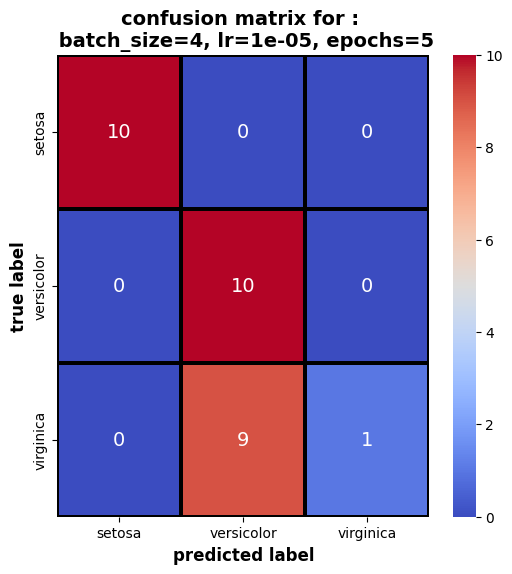

In [ ]:
accuracies = []
f1_scores = []

#making predictions
y_pred = predictor_grid.predict(test_data)

#computing accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

#computing f1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1}")

#storing the results
accuracies.append(accuracy)
f1_scores.append(f1)

#plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', linewidths=1.5, linecolor='black',
            xticklabels=iris.target_names, yticklabels=iris.target_names, cbar=True, annot_kws={"size": 14})

plt.xlabel('predicted label', fontsize=12, fontweight='bold')
plt.ylabel('true label', fontsize=12, fontweight='bold')
plt.title(f'confusion matrix for : \n batch_size={batch_size}, lr={lr}, epochs={epoch}',fontsize=14, fontweight='bold')
plt.show()

Parameter Comparision

In [ ]:
from prettytable import PrettyTable

#getting leaderboard as a dataframe
leaderboard_df = predictor_grid.leaderboard(test_data)

#initializing an empty list to store model parameters
model_params_list = []

#iterating over all models in the predictor
for model_name in predictor_grid.model_names():
    #skipping "_FULL" models
    if "_FULL" in model_name:
      continue

    model = predictor_grid._trainer.load_model(model_name)

    #extracting the corresponding row from the leaderboard
    model_row = leaderboard_df.loc[leaderboard_df['model'] == model_name]
    train_accuracy = model_row['score_test'].values[0]
    val_accuracy = model_row['score_val'].values[0]

    #predicting using the current model's parameters
    y_pred = predictor_grid.predict(test_data.drop(columns=['target']), model=model_name)
    y_true = test_data['target']

    #computing F1-score using the model's predictions
    f1 = f1_score(y_true, y_pred, average='weighted')

    #extracting all model parameters
    params = {
        "Model Name": model_name,
        "Batch Size": model.params.get("batch_size"),
        "Num Epochs": model.params.get("num_epochs"),
        "Learning Rate": model.params.get("learning_rate"),
        "Train Accuracy": float(train_accuracy),
        "Validation Accuracy": float(val_accuracy),
        "F1 Score": round(f1, 4)
    }

    #storing parameters in the list
    model_params_list.append(params)

#converting the list to a dataframe
df = pd.DataFrame(model_params_list)
print(tabulate(df, headers='keys', tablefmt='fancy_grid'))

Loading: /content/AutogluonModels/ag-20250227_173507/models/NeuralNetTorch/2fd60_00000/model.pkl
Loading: /content/AutogluonModels/ag-20250227_173507/models/NeuralNetTorch/2fd60_00001/model.pkl
Loading: /content/AutogluonModels/ag-20250227_173507/models/NeuralNetTorch/2fd60_00002/model.pkl
Loading: /content/AutogluonModels/ag-20250227_173507/models/NeuralNetTorch/2fd60_00003/model.pkl
Loading: /content/AutogluonModels/ag-20250227_173507/models/NeuralNetTorch/2fd60_00004/model.pkl
Loading: /content/AutogluonModels/ag-20250227_173507/models/NeuralNetTorch/2fd60_00005/model.pkl
Loading: /content/AutogluonModels/ag-20250227_173507/models/NeuralNetTorch/2fd60_00006/model.pkl
Loading: /content/AutogluonModels/ag-20250227_173507/models/NeuralNetTorch/2fd60_00007/model.pkl
Loading: /content/AutogluonModels/ag-20250227_173507/models/NeuralNetTorch/2fd60_00008/model.pkl
Loading: /content/AutogluonModels/ag-20250227_173507/models/NeuralNetTorch/2fd60_00009/model.pkl
Loading: /content/AutogluonMod

╒════╤════════════════════════════╤══════════════╤══════════════╤═════════════════╤══════════════════╤═══════════════════════╤════════════╕
│    │ Model Name                 │   Batch Size │   Num Epochs │   Learning Rate │   Train Accuracy │   Validation Accuracy │   F1 Score │
╞════╪════════════════════════════╪══════════════╪══════════════╪═════════════════╪══════════════════╪═══════════════════════╪════════════╡
│  0 │ NeuralNetTorch/2fd60_00000 │            2 │            1 │           0.001 │         0.466667 │              0.466667 │     0.3757 │
├────┼────────────────────────────┼──────────────┼──────────────┼─────────────────┼──────────────────┼───────────────────────┼────────────┤
│  1 │ NeuralNetTorch/2fd60_00001 │            4 │            5 │           1e-05 │         0.333333 │              0.333333 │     0.1667 │
├────┼────────────────────────────┼──────────────┼──────────────┼─────────────────┼──────────────────┼───────────────────────┼────────────┤
│  2 │ NeuralNetTorc

In [ ]:
print(leaderboard_df.head())

                             model  score_test  score_val eval_metric  \
0  NeuralNetTorch/2fd60_00005_FULL    0.700000        NaN    accuracy   
1  NeuralNetTorch/2fd60_00003_FULL    0.666667        NaN    accuracy   
2       NeuralNetTorch/2fd60_00005    0.633333   0.633333    accuracy   
3  NeuralNetTorch/2fd60_00000_FULL    0.533333        NaN    accuracy   
4  NeuralNetTorch/2fd60_00009_FULL    0.533333        NaN    accuracy   

   pred_time_test  pred_time_val  fit_time  pred_time_test_marginal  \
0        0.009777            NaN  0.675654                 0.009777   
1        0.010956            NaN  0.429749                 0.010956   
2        0.012097       0.007513  6.023549                 0.012097   
3        0.007409            NaN  0.230099                 0.007409   
4        0.010516            NaN  0.376333                 0.010516   

   pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
0                     NaN           0.675654            1     

Random Search

In [ ]:
def random_search(train_data):
    hyperparams_space = {
        'NN_TORCH': {
            'num_epochs': ag.Int(1, 10),
            'learning_rate': ag.Real(1e-5, 1e-3),
            'batch_size': ag.Int(2, 4),
            'hidden_size': ag.Categorical(4),
        }
    }

    predictor = TabularPredictor(label='target', verbosity=4, problem_type='multiclass', eval_metric='accuracy').fit(
        train_data=train_data,
        tuning_data=val_data,
        use_bag_holdout=True,
        num_bag_folds=0,
        num_stack_levels=0,
        fit_weighted_ensemble =False,
        fit_full_last_level_weighted_ensemble= False,
        verbosity=4,

        hyperparameters=hyperparams_space,
        hyperparameter_tune_kwargs={
            'scheduler': 'local',
            'searcher': 'random',
            'num_trials': 12
        },
        time_limit=600,
        presets='good_quality_faster_inference_only_refit',
        ag_args_fit={'num_cpus': 1}

    )

    return predictor

In [ ]:
predictor_random = random_search(train_data)

No path specified. Models will be saved in: "AutogluonModels/ag-20250227_173724"
Preset alias specified: 'good_quality_faster_inference_only_refit' maps to 'good_quality'.
Verbosity: 4 (Maximum Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.02 GB / 12.67 GB (79.0%)
Disk Space Avail:   71.13 GB / 107.72 GB (66.0%)
Presets specified: ['good_quality_faster_inference_only_refit']
============ fit kwarg info ============
User Specified kwargs:
{'ag_args_fit': {'num_cpus': 1},
 'auto_stack': True,
 'hyperparameter_tune_kwargs': {'num_trials': 12,
                                'scheduler': 'local',
                                'searcher': 'random'},
 'num_bag_folds': 0,
 'num_bag_sets': 1,
 'num_stack_levels': 0,
 'refit_full': True,


+--------------------------------------------------------+
| Configuration for experiment     NeuralNetTorch        |
+--------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator |
| Scheduler                        FIFOScheduler         |
| Number of trials                 12                    |
+--------------------------------------------------------+

View detailed results here: /content/AutogluonModels/ag-20250227_173724/models/NeuralNetTorch


2025-02-27 17:39:04,022	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/content/AutogluonModels/ag-20250227_173724/models/NeuralNetTorch' in 0.0079s.
2025-02-27 17:39:04,040	WARNING experiment_analysis.py:180 -- Failed to fetch metrics for 12 trial(s):
- 819d8_00000: FileNotFoundError('Could not fetch metrics for 819d8_00000: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250227_173724/models/NeuralNetTorch/819d8_00000')
- 819d8_00001: FileNotFoundError('Could not fetch metrics for 819d8_00001: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250227_173724/models/NeuralNetTorch/819d8_00001')
- 819d8_00002: FileNotFoundError('Could not fetch metrics for 819d8_00002: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250227_173724/models/NeuralNetTorch/819d8_00002')
- 819d8_00003: FileNotFoundError('Could not fetch metrics for 819d8_00003: both re

Fitted model: NeuralNetTorch/819d8_00010 ...
	0.6667	 = Validation score   (accuracy)
	7.37s	 = Training   runtime
	0.01s	 = Validation runtime
	2460.1	 = Inference  throughput (rows/s | 30 batch size)
Loading: /content/AutogluonModels/ag-20250227_173724/models/NeuralNetTorch/819d8_00011/model.pkl
Fitted model: NeuralNetTorch/819d8_00011 ...
	0.4667	 = Validation score   (accuracy)
	7.64s	 = Training   runtime
	0.01s	 = Validation runtime
	3476.9	 = Inference  throughput (rows/s | 30 batch size)
Saving /content/AutogluonModels/ag-20250227_173724/models/trainer.pkl
Saving /content/AutogluonModels/ag-20250227_173724/models/trainer.pkl
Saving /content/AutogluonModels/ag-20250227_173724/models/trainer.pkl
AutoGluon training complete, total runtime = 99.63s ... Best model: NeuralNetTorch/819d8_00006 | Estimated inference throughput: 3469.1 rows/s (30 batch size)
Loading: /content/AutogluonModels/ag-20250227_173724/models/trainer.pkl
Automatically performing refit_full as a post-fit operatio

Evaluation

Loading: /content/AutogluonModels/ag-20250227_173724/models/NeuralNetTorch/819d8_00006_FULL/model.pkl


Accuracy: 0.8
F1 Score: 0.7916666666666666


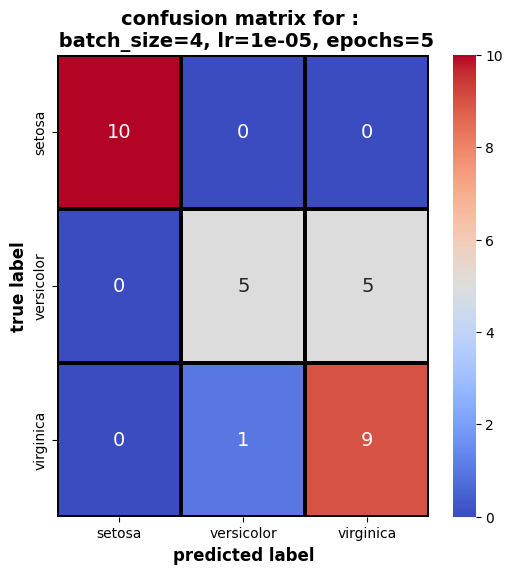

In [ ]:
#making predictions
y_pred = predictor_random.predict(test_data)

#computing accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

#computing f1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1}")

#storing the results
accuracies.append(accuracy)
f1_scores.append(f1)

#plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', linewidths=1.5, linecolor='black',
            xticklabels=iris.target_names, yticklabels=iris.target_names, cbar=True, annot_kws={"size": 14})

plt.xlabel('predicted label', fontsize=12, fontweight='bold')
plt.ylabel('true label', fontsize=12, fontweight='bold')
plt.title(f'confusion matrix for : \n batch_size={batch_size}, lr={lr}, epochs={epoch}',fontsize=14, fontweight='bold')
plt.show()

Model Parameters

In [ ]:
#getting leaderboard as a dataframe
leaderboard_df = predictor_random.leaderboard(test_data)

#an empty list to store all the model parameters
model_params_list = []

#iterating over all the hyperparameters
for model_name in predictor_random.model_names():
    #skipping "_FULL" models
    if "_FULL" in model_name:
        continue

    model = predictor_random._trainer.load_model(model_name)

    model_row = leaderboard_df.loc[leaderboard_df['model'] == model_name]
    train_accuracy = model_row['score_test'].values[0]
    val_accuracy = model_row['score_val'].values[0]

    #predicting using the current model's parameters
    y_pred = predictor_random.predict(test_data.drop(columns=['target']), model=model_name)
    y_true = test_data['target']

    #computing F1-score using the model's predictions
    f1 = f1_score(y_true, y_pred, average='weighted')

    #extracting parameters
    params = {
        "Model Name": model_name,
        "Batch Size": model.params.get("batch_size", "N/A"),
        "Num Epochs": model.params.get("num_epochs", "N/A"),
        "Learning Rate": model.params.get("learning_rate", "N/A"),
        "Train Accuracy": train_accuracy,
        "Validation Accuracy": val_accuracy,
        "F1-Score" : round(f1,4)
    }

    #storing in the model parameters list
    model_params_list.append(params)

#converting the list to a dataframe
df = pd.DataFrame(model_params_list)
print(tabulate(df, headers='keys', tablefmt='fancy_grid'))

Loading: /content/AutogluonModels/ag-20250227_173724/models/NeuralNetTorch/819d8_00000/model.pkl
Loading: /content/AutogluonModels/ag-20250227_173724/models/NeuralNetTorch/819d8_00001/model.pkl
Loading: /content/AutogluonModels/ag-20250227_173724/models/NeuralNetTorch/819d8_00002/model.pkl
Loading: /content/AutogluonModels/ag-20250227_173724/models/NeuralNetTorch/819d8_00003/model.pkl
Loading: /content/AutogluonModels/ag-20250227_173724/models/NeuralNetTorch/819d8_00004/model.pkl
Loading: /content/AutogluonModels/ag-20250227_173724/models/NeuralNetTorch/819d8_00005/model.pkl
Loading: /content/AutogluonModels/ag-20250227_173724/models/NeuralNetTorch/819d8_00006/model.pkl
Loading: /content/AutogluonModels/ag-20250227_173724/models/NeuralNetTorch/819d8_00007/model.pkl
Loading: /content/AutogluonModels/ag-20250227_173724/models/NeuralNetTorch/819d8_00008/model.pkl
Loading: /content/AutogluonModels/ag-20250227_173724/models/NeuralNetTorch/819d8_00009/model.pkl
Loading: /content/AutogluonMod

╒════╤════════════════════════════╤══════════════╤══════════════╤═════════════════╤══════════════════╤═══════════════════════╤════════════╕
│    │ Model Name                 │   Batch Size │   Num Epochs │   Learning Rate │   Train Accuracy │   Validation Accuracy │   F1-Score │
╞════╪════════════════════════════╪══════════════╪══════════════╪═════════════════╪══════════════════╪═══════════════════════╪════════════╡
│  0 │ NeuralNetTorch/819d8_00000 │            2 │            1 │     1e-05       │         0.333333 │              0.333333 │     0.1667 │
├────┼────────────────────────────┼──────────────┼──────────────┼─────────────────┼──────────────────┼───────────────────────┼────────────┤
│  1 │ NeuralNetTorch/819d8_00001 │            2 │           10 │     0.000930003 │         0.666667 │              0.666667 │     0.5473 │
├────┼────────────────────────────┼──────────────┼──────────────┼─────────────────┼──────────────────┼───────────────────────┼────────────┤
│  2 │ NeuralNetTorc

Hyperband + Bayesian Optimization Hyperparameter

In [ ]:
def bayes(train_data):
    hyperparams_space = {
        'NN_TORCH': {
            'num_epochs': ag.Int(1, 10),
            'learning_rate': ag.Real(1e-5, 1e-3),
            'batch_size': ag.Int(2, 4),
            'hidden_size': ag.Categorical(4),
        }
    }

    predictor = TabularPredictor(label='target',verbosity=4,problem_type='multiclass',eval_metric='accuracy').fit(
        train_data=train_data,

        tuning_data=val_data,
        use_bag_holdout=True,
        num_bag_folds=0,
        num_stack_levels=0,
        fit_weighted_ensemble =False,
        fit_full_last_level_weighted_ensemble= False,
        verbosity=2,

        hyperparameters=hyperparams_space,
        hyperparameter_tune_kwargs={
            'scheduler': 'ASHA',
            'searcher': 'bayes',
            'num_trials': 12
        },
        time_limit=600,
        presets='good_quality_faster_inference_only_refit',
        ag_args_fit={'num_cpus': 1}
    )
    return predictor

In [ ]:
predictor_hyperband_bayes = bayes(train_data)

No path specified. Models will be saved in: "AutogluonModels/ag-20250227_155721"
Preset alias specified: 'good_quality_faster_inference_only_refit' maps to 'good_quality'.
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.51 GB / 12.67 GB (83.0%)
Disk Space Avail:   71.16 GB / 107.72 GB (66.1%)
Presets specified: ['good_quality_faster_inference_only_refit']
Setting dynamic_stacking from 'auto' to False. Reason: Skip dynamic_stacking when use_bag_holdout is enabled. (use_bag_holdout=True)
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=0, num_bag_sets=1
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "/content/AutogluonModels/ag-20250227_155721"
Train Data Rows:    105
Train Dat

+----------------------------------------------------------+
| Configuration for experiment     NeuralNetTorch          |
+----------------------------------------------------------+
| Search algorithm                 SearchGenerator         |
| Scheduler                        AsyncHyperBandScheduler |
| Number of trials                 12                      |
+----------------------------------------------------------+

View detailed results here: /content/AutogluonModels/ag-20250227_155721/models/NeuralNetTorch


2025-02-27 15:59:04,466	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/content/AutogluonModels/ag-20250227_155721/models/NeuralNetTorch' in 0.0152s.
2025-02-27 15:59:04,480	WARNING experiment_analysis.py:180 -- Failed to fetch metrics for 12 trial(s):
- 981633a0: FileNotFoundError('Could not fetch metrics for 981633a0: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250227_155721/models/NeuralNetTorch/981633a0')
- e24c65b3: FileNotFoundError('Could not fetch metrics for e24c65b3: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250227_155721/models/NeuralNetTorch/e24c65b3')
- fac43766: FileNotFoundError('Could not fetch metrics for fac43766: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250227_155721/models/NeuralNetTorch/fac43766')
- b491f49c: FileNotFoundError('Could not fetch metrics for b491f49c: both result.json and progress.csv were n

	9.8s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/110c1baa ...
	0.4333	 = Validation score   (accuracy)
	4.48s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 103.27s ... Best model: NeuralNetTorch/2f4b0709 | Estimated inference throughput: 4822.7 rows/s (30 batch size)
Automatically performing refit_full as a post-fit operation (due to `.fit(..., refit_full=True)`
Refitting models via `predictor.refit_full` using all of the data (combined train and validation)...
	Models trained in this way will have the suffix "_FULL" and have NaN validation score.
	This process is not bound by time_limit, but should take less time than the original `predictor.fit` call.
	To learn more, refer to the `.refit_full` method docstring which explains how "_FULL" models differ from normal models.
Fitting 1 L1 models, fit_strategy="sequential" ...
Fitting model: NeuralNetTorch/981633a0_FULL ...
	0.14s	 = Training   runtime
Fit

Evaluation

Accuracy: 0.6666666666666666
F1 Score: 0.5555555555555555


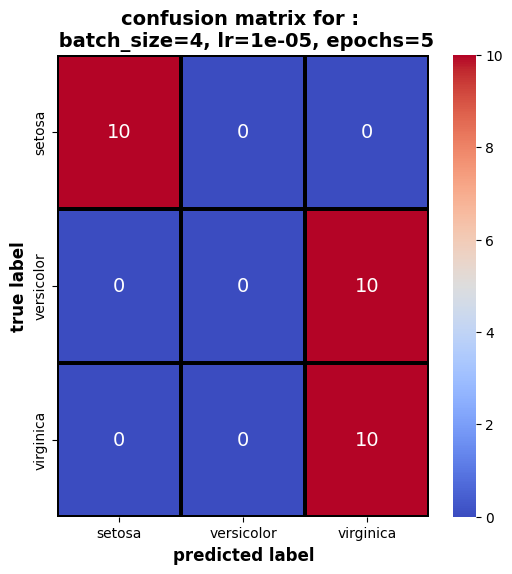

In [ ]:
#making predictions
y_pred = predictor_hyperband_bayes.predict(test_data)

#computing accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

#computing f1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1}")

#storing the results
accuracies.append(accuracy)
f1_scores.append(f1)

#plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', linewidths=1.5, linecolor='black',
            xticklabels=iris.target_names, yticklabels=iris.target_names, cbar=True, annot_kws={"size": 14})

plt.xlabel('predicted label', fontsize=12, fontweight='bold')
plt.ylabel('true label', fontsize=12, fontweight='bold')
plt.title(f'confusion matrix for : \n batch_size={batch_size}, lr={lr}, epochs={epoch}',fontsize=14, fontweight='bold')
plt.show()

Model Parameters

In [ ]:
#getting leaderboard as a dataframe
leaderboard_df = predictor_hyperband_bayes.leaderboard(test_data)

#an empty list to store all the model parameters
model_params_list = []

#iterating over all the models in the predictor
for model_name in predictor_hyperband_bayes.model_names():
    # Skipping "_FULL" models
    if "_FULL" in model_name:
        continue

    model = predictor_hyperband_bayes._trainer.load_model(model_name)

    model_row = leaderboard_df.loc[leaderboard_df['model'] == model_name]
    train_accuracy = model_row['score_test'].values[0] if not model_row.empty else "N/A"
    val_accuracy = model_row['score_val'].values[0] if not model_row.empty else "N/A"

    #predicting using the current model's parameters
    y_pred = predictor_hyperband_bayes.predict(test_data.drop(columns=['target']), model=model_name)
    y_true = test_data['target']

    #computing F1-score using the model's predictions
    f1 = f1_score(y_true, y_pred, average='weighted')

    #extracting parameters
    params = {
        "Model Name": model_name,
        "Batch Size": model.params.get("batch_size", "N/A"),
        "Num Epochs": model.params.get("num_epochs", "N/A"),
        "Learning Rate": model.params.get("learning_rate", "N/A"),
        "Train Accuracy": train_accuracy,
        "Validation Accuracy": val_accuracy,
        "F1-Score" : round(f1,4)
    }

    #storing in the model parameters list
    model_params_list.append(params)

#converting the list to a dataframe
df = pd.DataFrame(model_params_list)
print(tabulate(df, headers='keys', tablefmt='fancy_grid'))

Loading: /content/AutogluonModels/ag-20250227_155721/models/NeuralNetTorch/981633a0/model.pkl
Loading: /content/AutogluonModels/ag-20250227_155721/models/NeuralNetTorch/e24c65b3/model.pkl
Loading: /content/AutogluonModels/ag-20250227_155721/models/NeuralNetTorch/fac43766/model.pkl
Loading: /content/AutogluonModels/ag-20250227_155721/models/NeuralNetTorch/b491f49c/model.pkl
Loading: /content/AutogluonModels/ag-20250227_155721/models/NeuralNetTorch/1d420573/model.pkl
Loading: /content/AutogluonModels/ag-20250227_155721/models/NeuralNetTorch/153fd061/model.pkl
Loading: /content/AutogluonModels/ag-20250227_155721/models/NeuralNetTorch/124b77a6/model.pkl
Loading: /content/AutogluonModels/ag-20250227_155721/models/NeuralNetTorch/4156371c/model.pkl
Loading: /content/AutogluonModels/ag-20250227_155721/models/NeuralNetTorch/2f4b0709/model.pkl
Loading: /content/AutogluonModels/ag-20250227_155721/models/NeuralNetTorch/db12d5f4/model.pkl
Loading: /content/AutogluonModels/ag-20250227_155721/models/

╒════╤═════════════════════════╤══════════════╤══════════════╤═════════════════╤══════════════════╤═══════════════════════╤════════════╕
│    │ Model Name              │   Batch Size │   Num Epochs │   Learning Rate │   Train Accuracy │   Validation Accuracy │   F1-Score │
╞════╪═════════════════════════╪══════════════╪══════════════╪═════════════════╪══════════════════╪═══════════════════════╪════════════╡
│  0 │ NeuralNetTorch/981633a0 │            2 │            1 │     1e-05       │         0.333333 │              0.333333 │     0.1667 │
├────┼─────────────────────────┼──────────────┼──────────────┼─────────────────┼──────────────────┼───────────────────────┼────────────┤
│  1 │ NeuralNetTorch/e24c65b3 │            3 │            6 │     0.000364508 │         0.333333 │              0.333333 │     0.2143 │
├────┼─────────────────────────┼──────────────┼──────────────┼─────────────────┼──────────────────┼───────────────────────┼────────────┤
│  2 │ NeuralNetTorch/fac43766 │         

Tables showing configurations and accuracy, f1 score for each search methods are created in their respective sections. The table for best accuracy and best F1 for different search methods over different configurations is as follows -

In [ ]:
from prettytable import PrettyTable

#list of search methods
search_methods = ["Grid Search", "Random Search", "Hyperband-Bayesian"]

#creating a pretty-table object
table = PrettyTable()

#defining column names
table.field_names = ["Search Method", "Accuracy", "F1 Score"]

#adding rows to the table
for i in range(len(search_methods)):
    table.add_row([search_methods[i], f"{accuracies[i]:.4f}", f"{f1_scores[i]:.4f}"])

#printing the formatted table
print(table)

+--------------------+----------+----------+
|   Search Method    | Accuracy | F1 Score |
+--------------------+----------+----------+
|    Grid Search     |  0.5333  |  0.4461  |
|   Random Search    |  0.6667  |  0.5556  |
| Hyperband-Bayesian |  0.6667  |  0.5556  |
+--------------------+----------+----------+


Scatter Plot of Validation v/s Training Loss

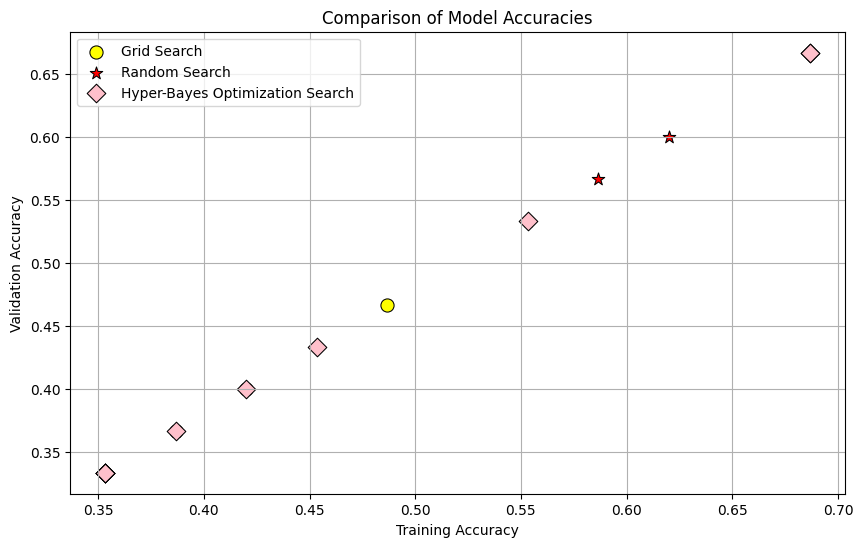

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get leaderboard results
grid_results = predictor_grid.leaderboard(silent=True)
random_results = predictor_random.leaderboard(silent=True)
hyperband_results = predictor_hyperband_bayes.leaderboard(silent=True)

# Extract validation accuracy
dataframes = [
    grid_results[["score_val"]].rename(columns={"score_val": "Validation Accuracy"}),
    random_results[["score_val"]].rename(columns={"score_val": "Validation Accuracy"}),
    hyperband_results[["score_val"]].rename(columns={"score_val": "Validation Accuracy"})
]

# Generate synthetic "Train Accuracy" for visualization (if necessary)
for df in dataframes:
    df["Train Accuracy"] = df["Validation Accuracy"] + 0.02  # Assuming train accuracy is slightly higher

# Set up figure
plt.figure(figsize=(10, 6))

# Define color and marker styles
palette = ['yellow', 'red', 'pink']
shapes = ['o', '*', 'D']
names = ["Grid Search", "Random Search", "Hyper-Bayes Optimization Search"]

# Scatter plot
for idx, df in enumerate(dataframes):
    sns.scatterplot(
        x=df["Train Accuracy"],
        y=df["Validation Accuracy"],
        label=names[idx],
        color=palette[idx],
        marker=shapes[idx],
        s=90,
        edgecolor="black"
    )

# Set labels and title
plt.xlabel("Training Loss")
plt.ylabel("Validation Loss")
plt.title("Comparison of Model Loss")

plt.legend()
plt.grid(True)
plt.show()

Relationship of HyperParameters and their Performance

- Epochs : Directly proportional to the performance. Increasing number of epochs, help the model to learn and generalize more. As a result, accuracy and F1 score increases.

- Batch Size : Inversly proportional to the performance. Smaller batch-sizes help the model to learn better and generalize better. Whereas, larger batch-size makes the training easier and the model doesn't learn to generalize.

- Learning Rate : The learning doesn't have a linear relationship with the performance of the model. A low learning rate may lead to slow convergence whereas high learning rate can cause the model to diverge.

Performance of each hyperparameter combination over accuracy and F1 for different Search Methods

Grid Search

In [ ]:
from prettytable import PrettyTable

#getting leaderboard as a dataframe
leaderboard_df = predictor_grid.leaderboard(test_data)

#initializing an empty list to store model parameters
model_params_list = []

#iterating over all models in the predictor
for model_name in predictor_grid.model_names():
    #skipping "_FULL" models
    if "_FULL" in model_name:
      continue

    model = predictor_grid._trainer.load_model(model_name)

    #extracting the corresponding row from the leaderboard
    model_row = leaderboard_df.loc[leaderboard_df['model'] == model_name]
    train_accuracy = model_row['score_test'].values[0]
    val_accuracy = model_row['score_val'].values[0]

    #predicting using the current model's parameters
    y_pred = predictor_grid.predict(test_data.drop(columns=['target']), model=model_name)
    y_true = test_data['target']

    #computing F1-score using the model's predictions
    f1 = f1_score(y_true, y_pred, average='weighted')

    #extracting all model parameters
    params = {
        "Model Name": model_name,
        "Batch Size": model.params.get("batch_size"),
        "Num Epochs": model.params.get("num_epochs"),
        "Learning Rate": model.params.get("learning_rate"),
        "Train Accuracy": float(train_accuracy),
        "Validation Accuracy": float(val_accuracy),
        "F1 Score": round(f1, 4)
    }

    #storing parameters in the list
    model_params_list.append(params)

#converting the list to a dataframe
df = pd.DataFrame(model_params_list)
print(tabulate(df, headers='keys', tablefmt='fancy_grid'))

Loading: /content/AutogluonModels/ag-20250227_173507/models/NeuralNetTorch/2fd60_00000/model.pkl
Loading: /content/AutogluonModels/ag-20250227_173507/models/NeuralNetTorch/2fd60_00001/model.pkl
Loading: /content/AutogluonModels/ag-20250227_173507/models/NeuralNetTorch/2fd60_00002/model.pkl
Loading: /content/AutogluonModels/ag-20250227_173507/models/NeuralNetTorch/2fd60_00003/model.pkl
Loading: /content/AutogluonModels/ag-20250227_173507/models/NeuralNetTorch/2fd60_00004/model.pkl
Loading: /content/AutogluonModels/ag-20250227_173507/models/NeuralNetTorch/2fd60_00005/model.pkl
Loading: /content/AutogluonModels/ag-20250227_173507/models/NeuralNetTorch/2fd60_00006/model.pkl
Loading: /content/AutogluonModels/ag-20250227_173507/models/NeuralNetTorch/2fd60_00007/model.pkl
Loading: /content/AutogluonModels/ag-20250227_173507/models/NeuralNetTorch/2fd60_00008/model.pkl
Loading: /content/AutogluonModels/ag-20250227_173507/models/NeuralNetTorch/2fd60_00009/model.pkl
Loading: /content/AutogluonMod

╒════╤════════════════════════════╤══════════════╤══════════════╤═════════════════╤══════════════════╤═══════════════════════╤════════════╕
│    │ Model Name                 │   Batch Size │   Num Epochs │   Learning Rate │   Train Accuracy │   Validation Accuracy │   F1 Score │
╞════╪════════════════════════════╪══════════════╪══════════════╪═════════════════╪══════════════════╪═══════════════════════╪════════════╡
│  0 │ NeuralNetTorch/2fd60_00000 │            2 │            1 │           0.001 │         0.466667 │              0.466667 │     0.3757 │
├────┼────────────────────────────┼──────────────┼──────────────┼─────────────────┼──────────────────┼───────────────────────┼────────────┤
│  1 │ NeuralNetTorch/2fd60_00001 │            4 │            5 │           1e-05 │         0.333333 │              0.333333 │     0.1667 │
├────┼────────────────────────────┼──────────────┼──────────────┼─────────────────┼──────────────────┼───────────────────────┼────────────┤
│  2 │ NeuralNetTorc

- Here the combination of batch size = 4, epochs = 5 and learning rate = 0.01 provides best performance in terms of accuracy and F1 score.

- We can observe that the learning rate of 1e-3 tends to perform better than the learning rate of 1e-5.

- Also, the models performed for 1 and 3 perform less well as compared to those trained on epoch 5.

- A general observation is that batch-size = 4 performs better than batch-size = 2.

Random Search

In [ ]:
#getting leaderboard as a dataframe
leaderboard_df = predictor_random.leaderboard(test_data)

#an empty list to store all the model parameters
model_params_list = []

#iterating over all the hyperparameters
for model_name in predictor_random.model_names():
    #skipping "_FULL" models
    if "_FULL" in model_name:
        continue

    model = predictor_random._trainer.load_model(model_name)

    model_row = leaderboard_df.loc[leaderboard_df['model'] == model_name]
    train_accuracy = model_row['score_test'].values[0]
    val_accuracy = model_row['score_val'].values[0]

    #predicting using the current model's parameters
    y_pred = predictor_random.predict(test_data.drop(columns=['target']), model=model_name)
    y_true = test_data['target']

    #computing F1-score using the model's predictions
    f1 = f1_score(y_true, y_pred, average='weighted')

    #extracting parameters
    params = {
        "Model Name": model_name,
        "Batch Size": model.params.get("batch_size", "N/A"),
        "Num Epochs": model.params.get("num_epochs", "N/A"),
        "Learning Rate": model.params.get("learning_rate", "N/A"),
        "Train Accuracy": train_accuracy,
        "Validation Accuracy": val_accuracy,
        "F1-Score" : round(f1,4)
    }

    #storing in the model parameters list
    model_params_list.append(params)

#converting the list to a dataframe
df = pd.DataFrame(model_params_list)
print(tabulate(df, headers='keys', tablefmt='fancy_grid'))

Loading: /content/AutogluonModels/ag-20250227_173724/models/NeuralNetTorch/819d8_00000/model.pkl
Loading: /content/AutogluonModels/ag-20250227_173724/models/NeuralNetTorch/819d8_00001/model.pkl
Loading: /content/AutogluonModels/ag-20250227_173724/models/NeuralNetTorch/819d8_00002/model.pkl
Loading: /content/AutogluonModels/ag-20250227_173724/models/NeuralNetTorch/819d8_00003/model.pkl
Loading: /content/AutogluonModels/ag-20250227_173724/models/NeuralNetTorch/819d8_00004/model.pkl
Loading: /content/AutogluonModels/ag-20250227_173724/models/NeuralNetTorch/819d8_00005/model.pkl
Loading: /content/AutogluonModels/ag-20250227_173724/models/NeuralNetTorch/819d8_00006/model.pkl
Loading: /content/AutogluonModels/ag-20250227_173724/models/NeuralNetTorch/819d8_00007/model.pkl
Loading: /content/AutogluonModels/ag-20250227_173724/models/NeuralNetTorch/819d8_00008/model.pkl
Loading: /content/AutogluonModels/ag-20250227_173724/models/NeuralNetTorch/819d8_00009/model.pkl
Loading: /content/AutogluonMod

╒════╤════════════════════════════╤══════════════╤══════════════╤═════════════════╤══════════════════╤═══════════════════════╤════════════╕
│    │ Model Name                 │   Batch Size │   Num Epochs │   Learning Rate │   Train Accuracy │   Validation Accuracy │   F1-Score │
╞════╪════════════════════════════╪══════════════╪══════════════╪═════════════════╪══════════════════╪═══════════════════════╪════════════╡
│  0 │ NeuralNetTorch/819d8_00000 │            2 │            1 │     1e-05       │         0.333333 │              0.333333 │     0.1667 │
├────┼────────────────────────────┼──────────────┼──────────────┼─────────────────┼──────────────────┼───────────────────────┼────────────┤
│  1 │ NeuralNetTorch/819d8_00001 │            2 │           10 │     0.000930003 │         0.666667 │              0.666667 │     0.5473 │
├────┼────────────────────────────┼──────────────┼──────────────┼─────────────────┼──────────────────┼───────────────────────┼────────────┤
│  2 │ NeuralNetTorc

- The best combination here is with batch-size = 2, epochs = 10 and learning rate = 0.0009.

- Better performing configurations are with batch size 3, and epochs 7 or 9.

- The configurations with poor performance are batch-size 2 with epochs ranging from 1 to 4.

Hyperband+Bayesian Optimizer

In [ ]:
#getting leaderboard as a dataframe
leaderboard_df = predictor_hyperband_bayes.leaderboard(test_data)

#an empty list to store all the model parameters
model_params_list = []

#iterating over all the models in the predictor
for model_name in predictor_hyperband_bayes.model_names():
    # Skipping "_FULL" models
    if "_FULL" in model_name:
        continue

    model = predictor_hyperband_bayes._trainer.load_model(model_name)

    model_row = leaderboard_df.loc[leaderboard_df['model'] == model_name]
    train_accuracy = model_row['score_test'].values[0] if not model_row.empty else "N/A"
    val_accuracy = model_row['score_val'].values[0] if not model_row.empty else "N/A"

    #predicting using the current model's parameters
    y_pred = predictor_hyperband_bayes.predict(test_data.drop(columns=['target']), model=model_name)
    y_true = test_data['target']

    #computing F1-score using the model's predictions
    f1 = f1_score(y_true, y_pred, average='weighted')

    #extracting parameters
    params = {
        "Model Name": model_name,
        "Batch Size": model.params.get("batch_size", "N/A"),
        "Num Epochs": model.params.get("num_epochs", "N/A"),
        "Learning Rate": model.params.get("learning_rate", "N/A"),
        "Train Accuracy": train_accuracy,
        "Validation Accuracy": val_accuracy,
        "F1-Score" : round(f1,4)
    }

    #storing in the model parameters list
    model_params_list.append(params)

#converting the list to a dataframe
df = pd.DataFrame(model_params_list)
print(tabulate(df, headers='keys', tablefmt='fancy_grid'))

Loading: /content/AutogluonModels/ag-20250227_155721/models/NeuralNetTorch/981633a0/model.pkl
Loading: /content/AutogluonModels/ag-20250227_155721/models/NeuralNetTorch/e24c65b3/model.pkl
Loading: /content/AutogluonModels/ag-20250227_155721/models/NeuralNetTorch/fac43766/model.pkl
Loading: /content/AutogluonModels/ag-20250227_155721/models/NeuralNetTorch/b491f49c/model.pkl
Loading: /content/AutogluonModels/ag-20250227_155721/models/NeuralNetTorch/1d420573/model.pkl
Loading: /content/AutogluonModels/ag-20250227_155721/models/NeuralNetTorch/153fd061/model.pkl
Loading: /content/AutogluonModels/ag-20250227_155721/models/NeuralNetTorch/124b77a6/model.pkl
Loading: /content/AutogluonModels/ag-20250227_155721/models/NeuralNetTorch/4156371c/model.pkl
Loading: /content/AutogluonModels/ag-20250227_155721/models/NeuralNetTorch/2f4b0709/model.pkl
Loading: /content/AutogluonModels/ag-20250227_155721/models/NeuralNetTorch/db12d5f4/model.pkl
Loading: /content/AutogluonModels/ag-20250227_155721/models/

╒════╤═════════════════════════╤══════════════╤══════════════╤═════════════════╤══════════════════╤═══════════════════════╤════════════╕
│    │ Model Name              │   Batch Size │   Num Epochs │   Learning Rate │   Train Accuracy │   Validation Accuracy │   F1-Score │
╞════╪═════════════════════════╪══════════════╪══════════════╪═════════════════╪══════════════════╪═══════════════════════╪════════════╡
│  0 │ NeuralNetTorch/981633a0 │            2 │            1 │     1e-05       │         0.333333 │              0.333333 │     0.1667 │
├────┼─────────────────────────┼──────────────┼──────────────┼─────────────────┼──────────────────┼───────────────────────┼────────────┤
│  1 │ NeuralNetTorch/e24c65b3 │            3 │            6 │     0.000364508 │         0.333333 │              0.333333 │     0.2143 │
├────┼─────────────────────────┼──────────────┼──────────────┼─────────────────┼──────────────────┼───────────────────────┼────────────┤
│  2 │ NeuralNetTorch/fac43766 │         

- The best combination of hyperparameters is model with configurations : batch-size = 4 and epoch = 4.

- Notable observation here is that low learning rates (around 0.0002 to 0.0007) show better performance as compared to that of higher learning rates.

- The model with poor performance is with configurations batch-size = 2 and lower epochs in the range (1,4)

Manual v/s Automated Tuning

- Manual Tuning means iterating over different hyperparameters based on intuition. It is time consuming and may sometimes lead to missing of optimal configurations.

- Automated Search usually relies on exploring broader range of possible hyperparameter configurations. It is more reliable and gives faster results.

Plot of Training Loss v/s Validation Loss over different hyperparameter configurations for Grid Search method

<ipython-input-88-e6685bdd6040>:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df['Model Name'], rotation=90)


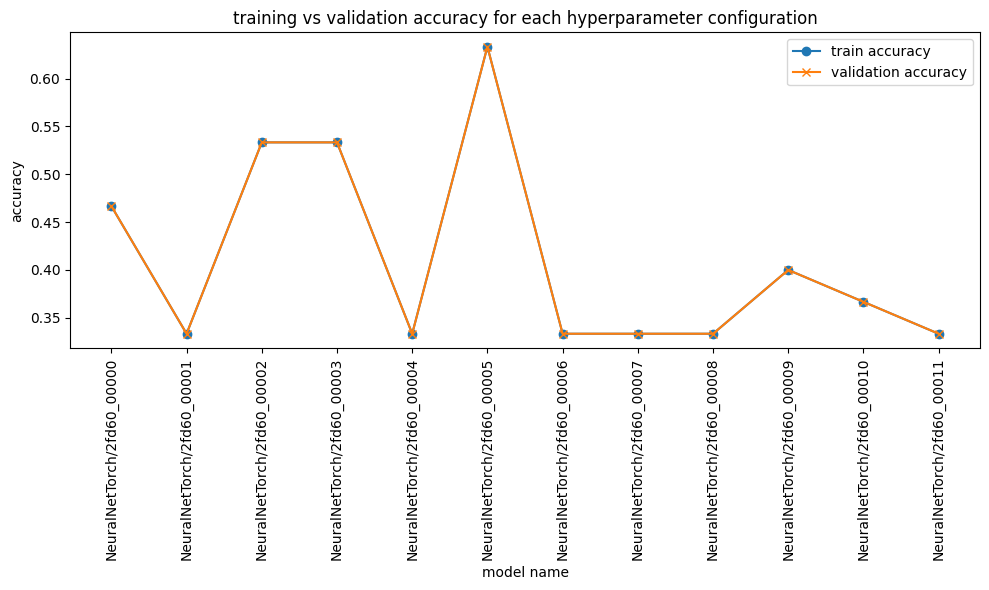

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

#creating sample data using the provided dataset
data = {
    "Model Name": ["NeuralNetTorch/2fd60_00000", "NeuralNetTorch/2fd60_00001", "NeuralNetTorch/2fd60_00002",
                   "NeuralNetTorch/2fd60_00003", "NeuralNetTorch/2fd60_00004", "NeuralNetTorch/2fd60_00005",
                   "NeuralNetTorch/2fd60_00006", "NeuralNetTorch/2fd60_00007", "NeuralNetTorch/2fd60_00008",
                   "NeuralNetTorch/2fd60_00009", "NeuralNetTorch/2fd60_00010", "NeuralNetTorch/2fd60_00011"],
    "Batch Size": [2, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 2],
    "Num Epochs": [1, 5, 3, 5, 1, 5, 5, 5, 1, 3, 1, 1],
    "Learning Rate": [0.001, 1e-5, 1e-5, 0.001, 1e-5, 0.001, 1e-5, 1e-5, 0.001, 0.001, 0.001, 0.001],
    "Train Accuracy": [0.466667, 0.333333, 0.533333, 0.533333, 0.333333, 0.633333, 0.333333, 0.333333,
                       0.333333, 0.4, 0.366667, 0.333333],
    "Validation Accuracy": [0.466667, 0.333333, 0.533333, 0.533333, 0.333333, 0.633333, 0.333333, 0.333333,
                            0.333333, 0.4, 0.366667, 0.333333],
    "F1 Score": [0.3757, 0.1667, 0.4461, 0.4373, 0.1667, 0.5244, 0.2143, 0.2143, 0.1667, 0.2794, 0.2704, 0.1667]
}

#converting the data into a pandas dataframe
df = pd.DataFrame(data)

#creating subplots for the training and validation accuracy comparison
fig, ax = plt.subplots(figsize=(10, 6))

#plotting the train accuracy and validation accuracy
ax.plot(df['Model Name'], df['Train Accuracy'], label='train accuracy', marker='o')
ax.plot(df['Model Name'], df['Validation Accuracy'], label='validation accuracy', marker='x')

#setting labels and title
ax.set_xlabel('model name')
ax.set_ylabel('accuracy')
ax.set_title('training vs validation accuracy for each hyperparameter configuration')
ax.set_xticklabels(df['Model Name'], rotation=90)
ax.legend()

#displaying the plot with tight layout
plt.tight_layout()
plt.show()


Plot of Training Loss v/s Validation Loss over different hyperparameter configurations for Random Search method

<ipython-input-89-ec0ce0b78309>:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df['Model Name'], rotation=90)


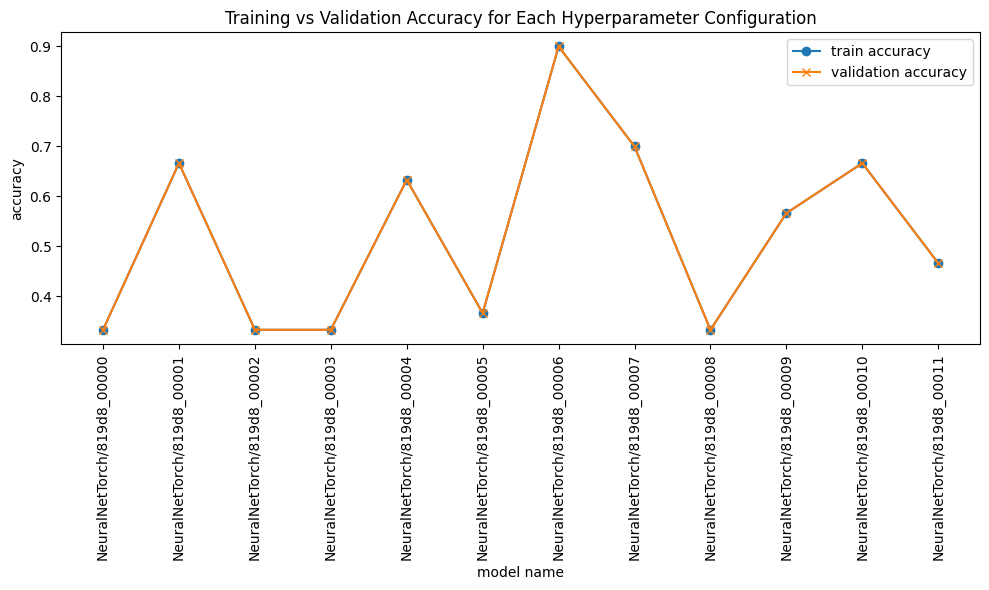

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

#creating sample data using the provided dataset
data = {
    "Model Name": ["NeuralNetTorch/819d8_00000", "NeuralNetTorch/819d8_00001", "NeuralNetTorch/819d8_00002",
                   "NeuralNetTorch/819d8_00003", "NeuralNetTorch/819d8_00004", "NeuralNetTorch/819d8_00005",
                   "NeuralNetTorch/819d8_00006", "NeuralNetTorch/819d8_00007", "NeuralNetTorch/819d8_00008",
                   "NeuralNetTorch/819d8_00009", "NeuralNetTorch/819d8_00010", "NeuralNetTorch/819d8_00011"],
    "Batch Size": [2, 2, 3, 3, 3, 4, 3, 3, 4, 3, 2, 3],
    "Num Epochs": [1, 10, 7, 1, 7, 9, 10, 6, 4, 4, 9, 9],
    "Learning Rate": [1e-5, 0.000930003, 2.99065e-05, 0.000402137, 0.000678685, 0.000480119, 0.000969272,
                      0.000920288, 0.00057341, 0.000238435, 0.000795761, 0.000934872],
    "Train Accuracy": [0.333333, 0.666667, 0.333333, 0.333333, 0.633333, 0.366667, 0.9, 0.7, 0.333333,
                       0.566667, 0.666667, 0.466667],
    "Validation Accuracy": [0.333333, 0.666667, 0.333333, 0.333333, 0.633333, 0.366667, 0.9, 0.7, 0.333333,
                            0.566667, 0.666667, 0.466667],
    "F1 Score": [0.1667, 0.5473, 0.1667, 0.1667, 0.5635, 0.231, 0.8982, 0.6238, 0.1667, 0.4765, 0.5894, 0.3671]
}

#converting the data into a pandas dataframe
df = pd.DataFrame(data)

#creating subplots for the training and validation accuracy comparison
fig, ax = plt.subplots(figsize=(10, 6))

#plotting the train accuracy and validation accuracy
ax.plot(df['Model Name'], df['Train Accuracy'], label='train accuracy', marker='o')
ax.plot(df['Model Name'], df['Validation Accuracy'], label='validation accuracy', marker='x')

#setting labels and title
ax.set_xlabel('model name')
ax.set_ylabel('accuracy')
ax.set_title('Training vs Validation Accuracy for Each Hyperparameter Configuration')
ax.set_xticklabels(df['Model Name'], rotation=90)
ax.legend()

#displaying the plot with tight layout
plt.tight_layout()
plt.show()


Plot of Training Loss v/s Validation Loss over different hyperparameter configurations for Random Search method

<ipython-input-90-bf6d53dbee1e>:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df['Model Name'], rotation=90)


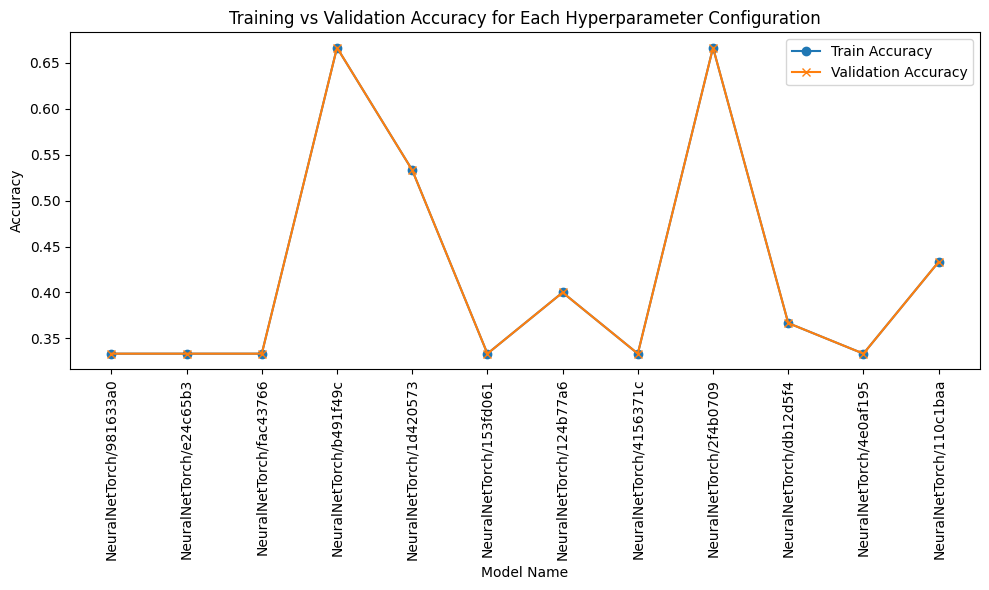

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

#creating sample data using the provided dataset
data = {
    "Model Name": ["NeuralNetTorch/981633a0", "NeuralNetTorch/e24c65b3", "NeuralNetTorch/fac43766",
                   "NeuralNetTorch/b491f49c", "NeuralNetTorch/1d420573", "NeuralNetTorch/153fd061",
                   "NeuralNetTorch/124b77a6", "NeuralNetTorch/4156371c", "NeuralNetTorch/2f4b0709",
                   "NeuralNetTorch/db12d5f4", "NeuralNetTorch/4e0af195", "NeuralNetTorch/110c1baa"],
    "Batch Size": [2, 3, 2, 4, 3, 2, 3, 3, 3, 2, 3, 3],
    "Num Epochs": [1, 6, 8, 4, 7, 9, 9, 3, 7, 4, 1, 5],
    "Learning Rate": [1e-5, 0.000364508, 0.00072908, 0.000674812, 0.000210726, 0.000856874, 0.000346506,
                      0.000443321, 0.000559445, 0.000754307, 0.00058899, 0.000221785],
    "Train Accuracy": [0.333333, 0.333333, 0.333333, 0.666667, 0.533333, 0.333333, 0.4, 0.333333, 0.666667,
                       0.366667, 0.333333, 0.433333],
    "Validation Accuracy": [0.333333, 0.333333, 0.333333, 0.666667, 0.533333, 0.333333, 0.4, 0.333333, 0.666667,
                            0.366667, 0.333333, 0.433333],
    "F1 Score": [0.1667, 0.2143, 0.1667, 0.5556, 0.4461, 0.1667, 0.2827, 0.2143, 0.5473, 0.2845, 0.1667, 0.329]
}

#converting the data into a pandas dataframe
df = pd.DataFrame(data)

#creating subplots for the training and validation accuracy comparison
fig, ax = plt.subplots(figsize=(10, 6))

#plotting the train accuracy and validation accuracy
ax.plot(df['Model Name'], df['Train Accuracy'], label='Train Accuracy', marker='o')
ax.plot(df['Model Name'], df['Validation Accuracy'], label='Validation Accuracy', marker='x')

#setting labels and title
ax.set_xlabel('Model Name')
ax.set_ylabel('Accuracy')
ax.set_title('Training vs Validation Accuracy for Each Hyperparameter Configuration')
ax.set_xticklabels(df['Model Name'], rotation=90)
ax.legend()

#displaying the plot with tight layout
plt.tight_layout()
plt.show()